In [1]:
from minisom import MiniSom
import pandas as pd
from ast import literal_eval





In [2]:
def get_memberships(self):
    return [t[1] for t in self]

In [3]:
projects = pd.read_csv("data/covid-preprints_projects.csv")
topics = projects['topic_affiliation'].apply(literal_eval)
# print(type(topics))
topics = topics.apply(lambda s: get_memberships(s))
topics = topics[:100]
print(topics[0])

[0.001970364013686776, 0.001970266457647085, 0.001970268553122878, 0.00197023362852633, 0.0019702587742358446, 0.0019703167490661144, 0.0019702317658811808, 0.0019702145364135504, 0.0019702049903571606, 0.9822676777839661]


In [4]:
som = MiniSom(100, 100, 10, sigma=0.3, learning_rate=0.5)
som.train(topics, 1000)
winners = []
for cnt, sample in enumerate(topics):
    w = som.winner(sample)
    winners.append(w)
    #print(w[0], ',', w[1])
winners_out = pd.DataFrame(winners, columns=['x', 'y'])

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

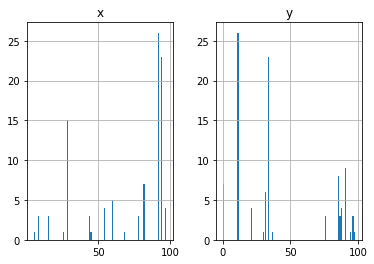

In [6]:
winners_out.hist(bins=100)